# Importing

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics.pairwise import cosine_similarity

import librosa
import librosa.display
import IPython.display as ipd

import eli5
from eli5.sklearn import PermutationImportance

import os
import warnings
warnings.filterwarnings('ignore')

# EDA

In [6]:
dir_ = 'main/Data'
print(list(os.listdir(f'{dir_}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [7]:
y, s = librosa.load(f'{dir_}/genres_original/blues/blues.00023.wav')

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', s, '\n')

print('Check Len of Audio:', 661794/22050)

y: [ 0.17184448  0.20730591  0.08227539 ...  0.00271606 -0.02062988
 -0.01370239] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [8]:
audio, _ = librosa.effects.trim(y)

print('Audio File:', audio, '\n')
print('Audio File shape:', np.shape(audio))

Audio File: [ 0.17184448  0.20730591  0.08227539 ...  0.00271606 -0.02062988
 -0.01370239] 

Audio File shape: (661794,)


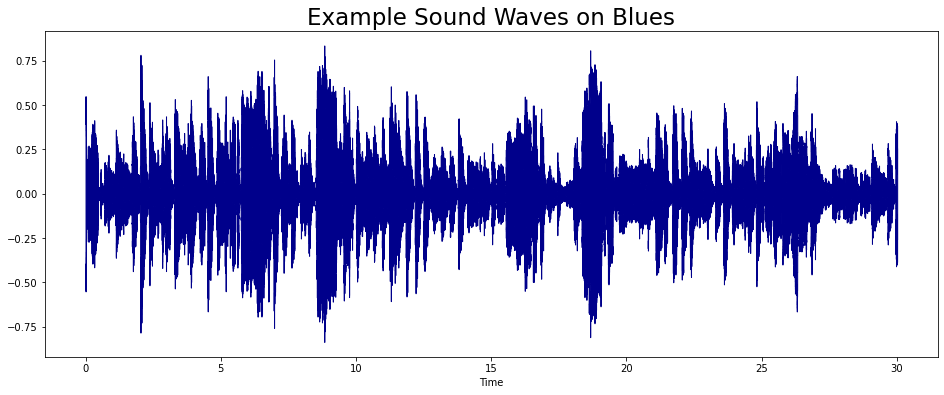

In [9]:
plt.figure(figsize = (16, 6))
librosa.display.waveshow(y = audio, sr = s, color = "#00008B");
plt.title("Example Sound Waves on Blues", fontsize = 23);

In [11]:
#Fourier Transform

fft = 2048
hl = 512

stft = np.abs(librosa.stft(audio, n_fft = fft, hop_length = hl))

print(np.shape(stft))

(1025, 1293)


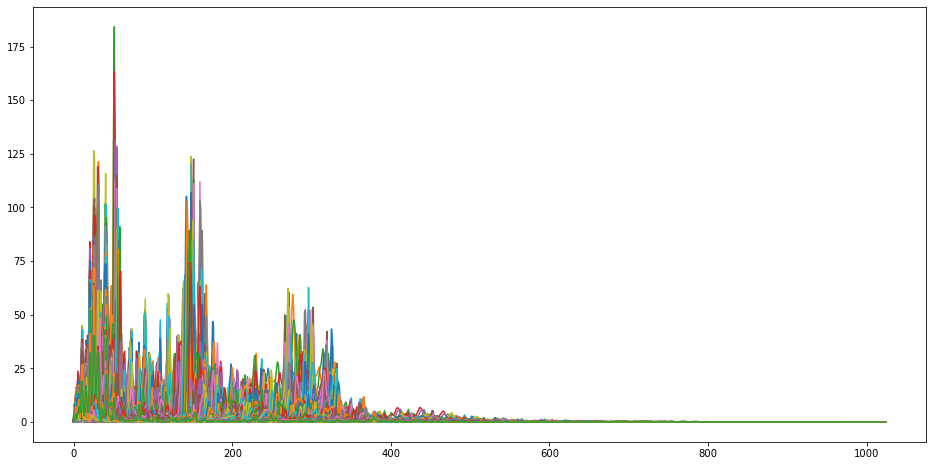

In [12]:
plt.figure(figsize = (16, 8))
plt.plot(stft);

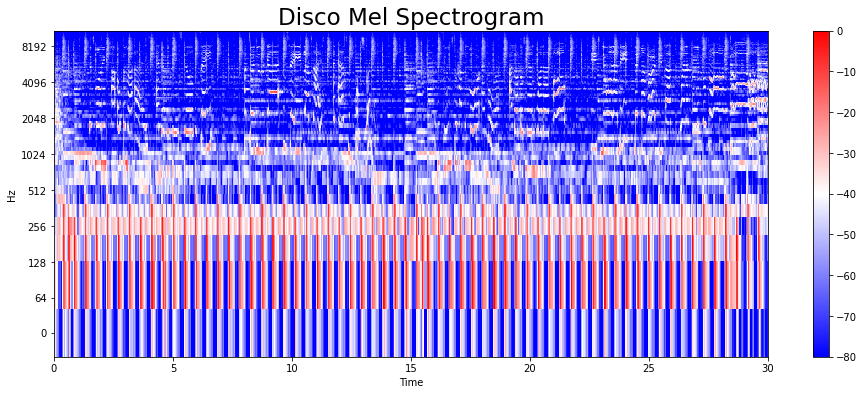

In [13]:
y, s = librosa.load(f'{dir_}/genres_original/disco/disco.00007.wav')
y, z = librosa.effects.trim(y)


mel = librosa.feature.melspectrogram(y, sr=s)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=s, hop_length=hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("Disco Mel Spectrogram", fontsize = 23);

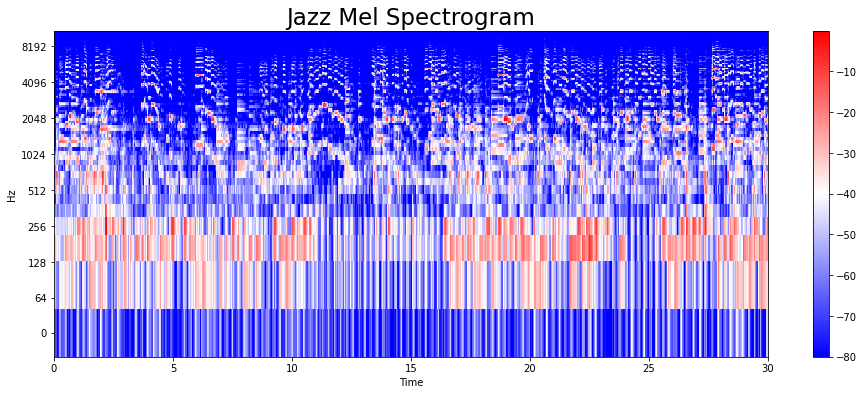

In [14]:
y, s = librosa.load(f'{dir_}/genres_original/jazz/jazz.00015.wav')
y, z = librosa.effects.trim(y)


mel = librosa.feature.melspectrogram(y, sr=s)
mel_db = librosa.amplitude_to_db(mel, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(mel_db, sr=s, hop_length=hl, x_axis = 'time', y_axis = 'log',
                        cmap = 'bwr');
plt.colorbar();
plt.title("Jazz Mel Spectrogram", fontsize = 23);

(20, 1293)


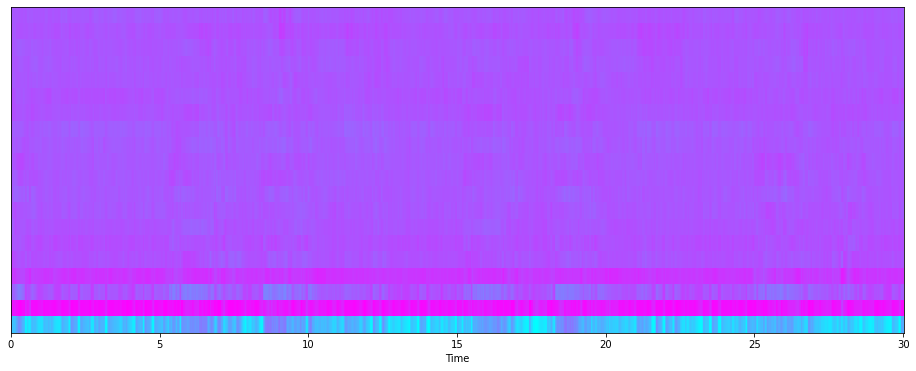

In [16]:
mfcc = librosa.feature.mfcc(audio, sr=s)
print(mfcc.shape)

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfcc, sr=s, x_axis='time', cmap = 'cool');

Mean: 1.7701611e-09 

Var: 1.0


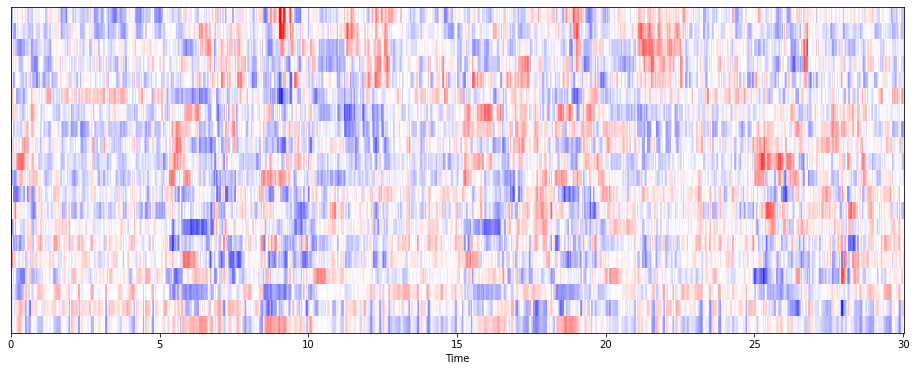

In [17]:
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
print('Mean:', mfcc.mean(), '\n')
print('Var:', mfcc.var())

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfcc, sr=s, x_axis='time', cmap = 'bwr');

In [18]:
df = pd.read_csv(f'{dir_}/features_30_sec.csv')
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,rock.00095.wav,661794,0.352063,0.080487,0.079486,0.000345,2008.149458,282174.689224,2106.541053,88609.749506,...,45.050526,-13.289984,41.754955,2.484145,36.778877,-6.713265,54.866825,-1.193787,49.950665,rock
996,rock.00096.wav,661794,0.398687,0.075086,0.076458,0.000588,2006.843354,182114.709510,2068.942009,82426.016726,...,33.851742,-10.848309,39.395096,1.881229,32.010040,-7.461491,39.196327,-2.795338,31.773624,rock
997,rock.00097.wav,661794,0.432142,0.075268,0.081651,0.000322,2077.526598,231657.968040,1927.293153,74717.124394,...,33.597008,-12.845291,36.367264,3.440978,36.001110,-12.588070,42.502201,-2.106337,29.865515,rock
998,rock.00098.wav,661794,0.362485,0.091506,0.083860,0.001211,1398.699344,240318.731073,1818.450280,109090.207161,...,46.324894,-4.416050,43.583942,1.556207,34.331261,-5.041897,47.227180,-3.590644,41.299088,rock


Text(0, 0.5, 'BPM')

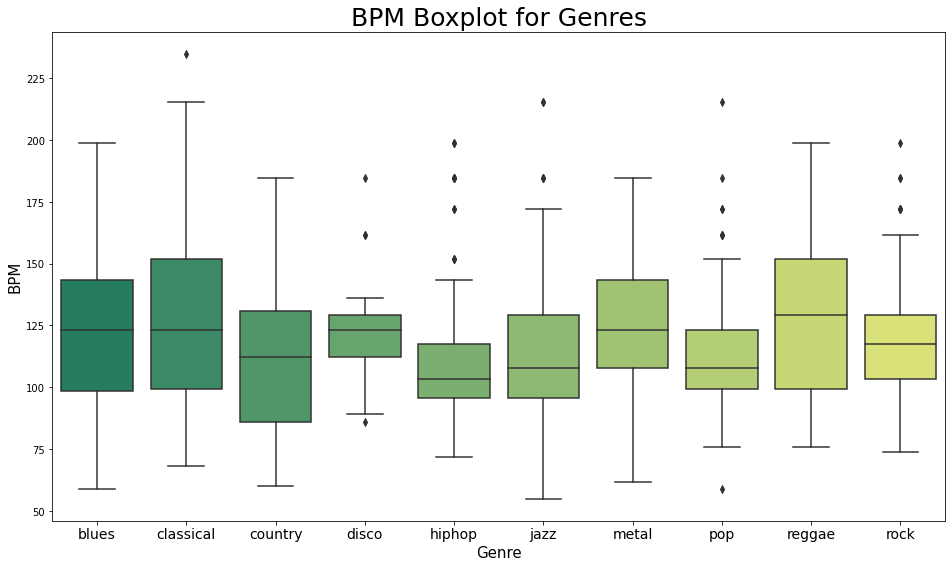

In [19]:
x = df[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'summer');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)

# Scaling

In [26]:
df = df.iloc[0:, 1:]
y = df['label']
X = df.loc[:, df.columns != 'label']

cols = X.columns
scaler = preprocessing.MinMaxScaler()

np_scaled = scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

pca = PCA(n_components=2)
scaled_df = pca.fit_transform(X)
df_p = pd.DataFrame(data = scaled_df, columns = ['pca1', 'pca2'])

fdf = pd.concat([df_p, y], axis = 1)

pca.explained_variance_ratio_

array([0.26705906, 0.18370582])

Text(0, 0.5, 'Principal Component 2')

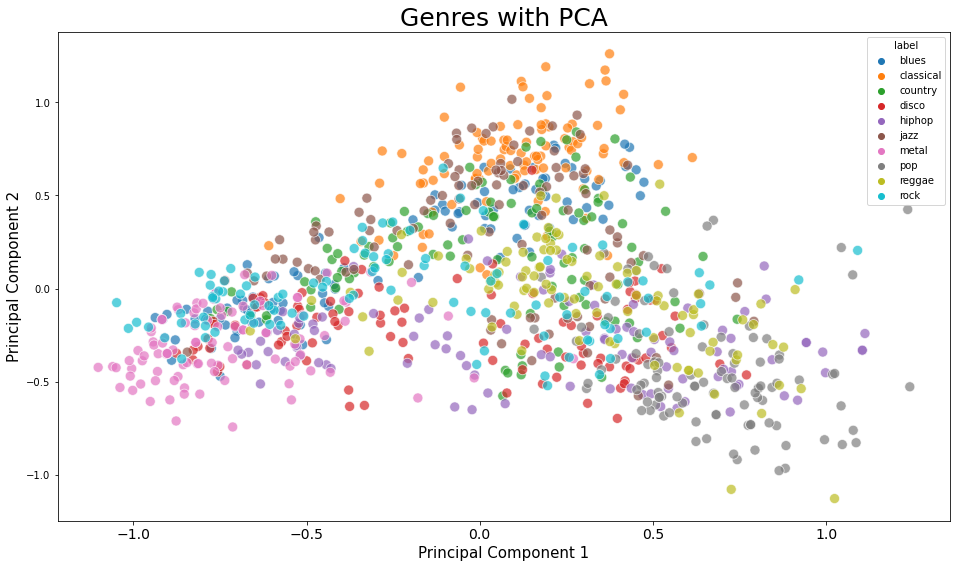

In [31]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "pca1", y = "pca2", data = fdf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('Genres with PCA', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)

# Modeling

In [32]:
df = pd.read_csv(f'{dir_}/features_3_sec.csv')
df = df.iloc[0:, 1:] 
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [33]:
y = df['label']
X = df.loc[:, df.columns != 'label']

cols = X.columns
scaler = preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns = cols)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
def model_assess(model, title = "Default"):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(confusion_matrix(y_test, preds))
    print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')

In [39]:
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

tree = DecisionTreeClassifier()
model_assess(tree, "Decision trees")

lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

[[100   6  61  12   1  19  85   0  12  23]
 [  0 275   1   0   0  21   0   0   1  10]
 [ 20  11 166  25   4   8  22  11  10   9]
 [ 13   4  30 102  13   2  57  46  17  17]
 [  8   1  15  36 109   0  44  60  36   2]
 [ 10  59  34   6   0 117   8  13   5  34]
 [  5   0   3  11   3   0 269   0   3   9]
 [  0   0  17  18   2   1   0 208  13   8]
 [ 19   1  61  10  23   3   6  29 149  15]
 [  8   6  49  40   2   7  96  13  17  62]]
Accuracy Naive Bayes : 0.51952 

[[256   5  22   4   2   8   6   0  10   6]
 [  0 297   1   0   0  10   0   0   0   0]
 [  9   2 230  11   1  13   0   1  12   7]
 [  7   6   8 246   8   0   2   4   6  14]
 [  7   1  15  24 217   0   9  21  14   3]
 [  2  30  16   2   0 233   0   2   1   0]
 [  6   0   2  15   5   0 252   0   4  19]
 [  0   0   6  17   2   2   0 229  10   1]
 [  3   1  16  20  13   0   2  11 248   2]
 [ 11   1  20  35   0   7   7   2  10 207]]
Accuracy KNN : 0.80581 

[[167   1  31  15  13  16  15  10  17  34]
 [  3 258  13   2   0  23   0   3   1

Accuracy : 0.80581 



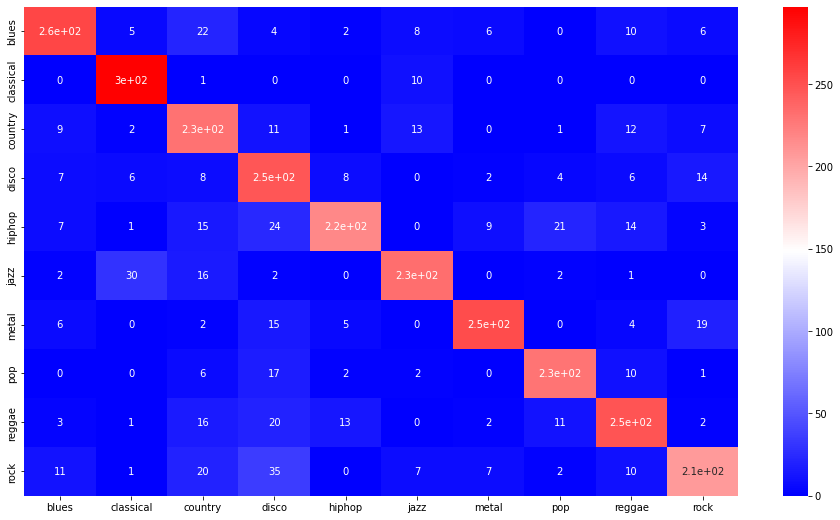

In [40]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train, y_train)


preds = knn.predict(X_test)

print('Accuracy', ':', round(accuracy_score(y_test, preds), 5), '\n')

conf = confusion_matrix(y_test, preds)

plt.figure(figsize = (16, 9))
sns.heatmap(conf, cmap="bwr", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);

In [31]:
perm = PermutationImportance(estimator=rf, random_state=1)
perm.fit(X_test, y_test)

eli5.show_weights(estimator=perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0285 ± 0.0069,chroma_stft_mean
0.0254 ± 0.0044,rms_var
0.0251 ± 0.0040,perceptr_var
0.0240 ± 0.0094,mfcc4_mean
0.0187 ± 0.0033,perceptr_mean
0.0157 ± 0.0037,mfcc9_mean
0.0154 ± 0.0019,harmony_mean
0.0151 ± 0.0030,mfcc6_mean
0.0149 ± 0.0037,harmony_var
0.0099 ± 0.0033,mfcc8_mean


In [55]:
df = pd.read_csv(f'{dir_}/features_30_sec.csv', index_col='filename')

labels = df[['label']]

df = df.drop(columns=['length','label'])
df

scaled=preprocessing.scale(df)
print('Scaled data type:', type(scaled))

Scaled data type: <class 'numpy.ndarray'>


In [56]:
similarity = cosine_similarity(scaled)
print("Similarity shape:", similarity.shape)

sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names

Similarity shape: (1000, 1000)


filename,blues.00000.wav,blues.00001.wav,blues.00002.wav,blues.00003.wav,blues.00004.wav,blues.00005.wav,blues.00006.wav,blues.00007.wav,blues.00008.wav,blues.00009.wav,...,rock.00090.wav,rock.00091.wav,rock.00092.wav,rock.00093.wav,rock.00094.wav,rock.00095.wav,rock.00096.wav,rock.00097.wav,rock.00098.wav,rock.00099.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,1.000000,0.049231,0.589618,0.284862,0.025561,-0.346688,-0.219483,-0.167626,0.641877,-0.097889,...,-0.082829,0.546169,0.578558,0.662590,0.571629,0.610942,0.640835,0.496294,0.284958,0.304098
blues.00001.wav,0.049231,1.000000,-0.096834,0.520903,0.080749,0.307856,0.318286,0.415258,0.120649,0.404168,...,-0.098111,-0.325126,-0.370792,-0.191698,-0.330834,-0.077301,-0.222119,-0.302573,0.499562,0.311723
blues.00002.wav,0.589618,-0.096834,1.000000,0.210411,0.400266,-0.082019,-0.028061,0.104446,0.468113,-0.132532,...,-0.032408,0.561074,0.590779,0.583293,0.514537,0.495707,0.566837,0.589983,0.216378,0.321069
blues.00003.wav,0.284862,0.520903,0.210411,1.000000,0.126437,0.134796,0.300746,0.324566,0.352758,0.295184,...,-0.320107,-0.206516,-0.151132,0.041986,-0.172515,-0.000287,0.020515,-0.107821,0.502279,0.183210
blues.00004.wav,0.025561,0.080749,0.400266,0.126437,1.000000,0.556066,0.482195,0.623455,0.029703,0.471657,...,0.087605,0.017366,0.138035,0.104684,-0.034594,0.063454,0.063546,0.172944,0.153192,0.061785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rock.00095.wav,0.610942,-0.077301,0.495707,-0.000287,0.063454,-0.231012,-0.251086,-0.180628,0.619450,-0.258421,...,0.023926,0.843727,0.851726,0.860594,0.851456,1.000000,0.902064,0.865241,0.349870,0.522483
rock.00096.wav,0.640835,-0.222119,0.566837,0.020515,0.063546,-0.272209,-0.291506,-0.256171,0.612170,-0.304636,...,-0.033826,0.871226,0.882825,0.880362,0.863062,0.902064,1.000000,0.902071,0.337834,0.472331
rock.00097.wav,0.496294,-0.302573,0.589983,-0.107821,0.172944,-0.175960,-0.203014,-0.155732,0.461320,-0.330066,...,-0.008336,0.914170,0.926558,0.897654,0.878851,0.865241,0.902071,1.000000,0.287157,0.415173


In [60]:
def find_similar_songs(name):
    series = sim_df_names[name].sort_values(ascending = False)
    series = series.drop(name)
    print("\n*******\nSimilar songs to ", name)
    print(series.head(10))

In [62]:
find_similar_songs('metal.00003.wav') 

ipd.Audio(f'{dir_}/genres_original/metal/metal.00003.wav')


*******
Similar songs to  metal.00003.wav
filename
metal.00021.wav    0.950326
metal.00027.wav    0.912848
metal.00020.wav    0.904816
metal.00026.wav    0.901739
metal.00040.wav    0.898215
metal.00061.wav    0.898215
metal.00071.wav    0.893907
metal.00017.wav    0.880743
metal.00032.wav    0.866838
metal.00086.wav    0.861856
Name: metal.00003.wav, dtype: float64
